# Technical Report: NCR Ride Bookings Dataset

## Dataset Origin & Description
- Source: NCR Ride Bookings dataset (provided for analysis).
- Size: 150,000 rows × 21 columns.
- Variables: booking details, cancellations, ratings, ride distances, payment methods.
- Purpose: To analyze cancellations, vehicle usage patterns, and demand trends in ride-hailing.

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("ncr_ride_bookings.csv")

# Basic overview
df.shape, df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

((150000, 21),
 None,
          Date      Time    Booking ID   Booking Status   Customer ID  \
 0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
 1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
 2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
 3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
 4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   
 
     Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
 0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
 1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
 2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
 3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
 4           Bike     Ghitorni Village        Khan Market       5.3      19.6   
 
    ...  Reason for cancelling by Customer Cancell

## Preprocessing & Cleaning Steps
- Converted `Date` and `Time` columns into a combined datetime.
- Handled missing values (e.g., dropped rows with NA for ride distance in distribution plots).
- Extracted the `Hour` from booking times for time-of-day analysis.
- Simplified cancellation reason categories for readability.


In [3]:
# Combine Date + Time into datetime
df['Datetime'] = pd.to_datetime(df['Date'] + " " + df['Time'], errors='coerce')

# Extract hour for later visualization
df['Hour'] = df['Datetime'].dt.hour

# Check missing values
df.isna().sum()


Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
Datetime                                  0
Hour                            

## Visualization & Design Choices
- **Bar Chart:** Chosen for cancellation reasons, because categorical data is best compared with bar lengths.
- **Box Plot:** Used for ride distance by vehicle type to show distribution, spread, and outliers.
- **Line Chart:** Used for hourly booking demand to highlight temporal trends.


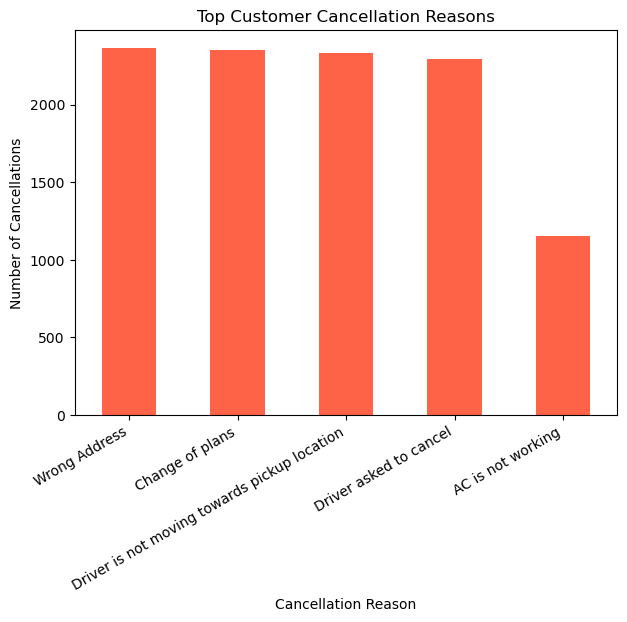

In [4]:
import matplotlib.pyplot as plt


# Chart 1: Bar Chart of Cancellation Reasons
cancel_counts = df['Reason for cancelling by Customer'].value_counts()

plt.figure(figsize=(7,5))
cancel_counts.plot(kind='bar', color='tomato')
plt.title("Top Customer Cancellation Reasons")
plt.ylabel("Number of Cancellations")
plt.xlabel("Cancellation Reason")
plt.xticks(rotation=30, ha="right")
plt.savefig('charts/barchart_cancellationreasons.png', dpi=300, bbox_inches="tight")
plt.show()



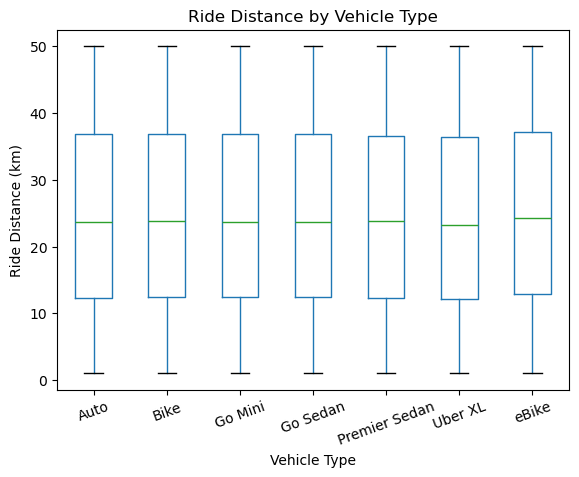

In [8]:
# Chart 2: Box Plot of Ride Distance by Vehicle Type
df[['Vehicle Type', 'Ride Distance']].dropna().boxplot(by='Vehicle Type', column=['Ride Distance'], grid=False)
plt.title("Ride Distance by Vehicle Type")
plt.suptitle("")  # remove auto-title
plt.ylabel("Ride Distance (km)")
plt.xticks(rotation=20)
plt.savefig('charts/boxplot_typeanddistance.png', dpi=300, bbox_inches='tight')
plt.show()





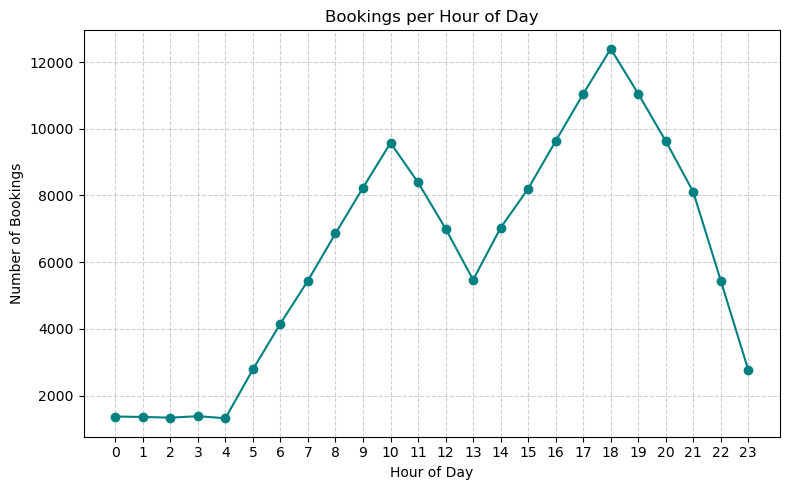

In [7]:
# --- Line Chart: Bookings per Hour of Day ---
hourly_counts = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-', color='teal')
plt.title("Bookings per Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Bookings")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))  # show all hours 0-23
plt.tight_layout()
plt.savefig('charts/linegraph_bookingsperday.png', dpi=300, bbox_inches='tight')
plt.show()

## Reflection
- **Worked well:** Charts clearly showed cancellation patterns, vehicle type differences, and demand peaks.
- **Challenges:** Many missing values in cancellation and rating fields made analysis incomplete.
- **Next Steps:** With more time, I would:
  - Merge similar cancellation reason categories.
  - Explore correlations between customer ratings and driver cancellations.
  - Build predictive models for cancellation likelihood.
